# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/Users/alexisbloor/Desktop/Homework/api homework/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [25]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [26]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
# print(json.dumps(weather_json, indent =4))

# weather_df = pd.DataFrame(columns = ["City", "Cloudiness", "Country", "Date", "Max Temp", "Wind Speed", "Lat", "Lng", "Humidity"])


In [29]:

city_list = []
cloud = []
country = []
date = []
humidity = []
lat = []
lng = []
temp_max = []
wind_speed = []
index_counter = 0
set_counter = 1

print("Beginning Data Retrieval ")
print("-------------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#For loop matching city names with city_list
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloud.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp_max.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval 
-------------------------------
Processing Record 1 of Set 1 : pevek
Processing Record 2 of Set 1 : hobart
Processing Record 3 of Set 1 : new norfolk
Processing Record 4 of Set 1 : hambantota
City not found. Skipping...
Processing Record 5 of Set 1 : bra
Processing Record 6 of Set 1 : victoria
Processing Record 7 of Set 1 : busselton
Processing Record 8 of Set 1 : jamestown
Processing Record 9 of Set 1 : cape town
Processing Record 10 of Set 1 : sukumo
Processing Record 11 of Set 1 : rikitea
Processing Record 12 of Set 1 : dikson
Processing Record 13 of Set 1 : torbay
Processing Record 14 of Set 1 : atakpame
Processing Record 15 of Set 1 : pali
City not found. Skipping...
Processing Record 16 of Set 1 : veraval
Processing Record 17 of Set 1 : mahebourg
City not found. Skipping...
Processing Record 18 of Set 1 : ushuaia
Processing Record 19 of Set 1 : punta arenas
Processing Record 20 of Set 1 : aden
Processing Record 21 of Set 1 : tiksi
Processing Record 22 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
weather_data = pd.DataFrame({"City": city_list, "Lat": lat, "Lng": lng, "Max Temp": temp_max, "Humidity": humidity, "Cloudiness": cloud, "Wind Speed": wind_speed, "Country": country, "Date": date})
weather_data.head()

weather_data.to_csv("/Users/alexisbloor/Desktop/Homework/api homework/cities_new.csv", index=False)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pevek,69.7008,170.3133,19.67,92,100,2.82,RU,1634141246
1,Hobart,-42.8794,147.3294,53.26,82,90,3.44,AU,1634141054
2,New Norfolk,-42.7826,147.0587,52.92,70,100,2.44,AU,1634141141
3,Hambantota,6.1241,81.1185,80.94,83,0,8.05,LK,1634141269
4,Bra,44.7030,7.8556,66.15,51,51,6.67,IT,1634141270
...,...,...,...,...,...,...,...,...,...
568,Norsup,-16.0667,167.3833,78.30,85,80,5.86,VU,1634141437
569,Grants Pass,42.4390,-123.3284,47.71,92,90,1.01,US,1634141437
570,Severodvinsk,64.5635,39.8302,42.91,93,100,7.52,RU,1634141438
571,Chongwe,-15.3292,28.6820,79.14,17,0,9.15,ZM,1634141438


In [37]:
weather_data["Humidity"].describe()


count    573.000000
mean      68.752182
std       22.462821
min        6.000000
25%       57.000000
50%       75.000000
75%       85.000000
max      100.000000
Name: Humidity, dtype: float64

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# no cities over 100% humidity

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

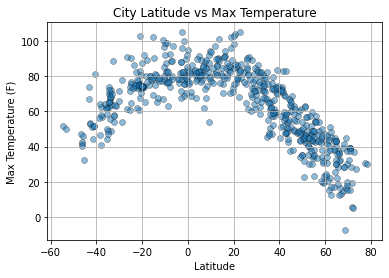

In [42]:
x_values = weather_data["Lat"]
y_values = weather_data["Max Temp"]

# fig1, ax1 = plt.subplots(figsize=(11,8))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=.5, marker="o", alpha=0.5)
plt.title(f"City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()


## Latitude vs. Humidity Plot

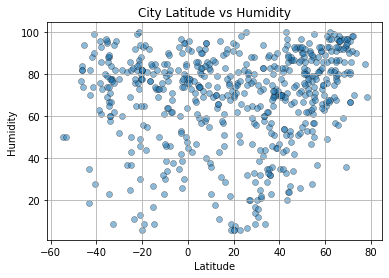

In [43]:
x_values = weather_data["Lat"]
y_values = weather_data["Humidity"]

# fig1, ax1 = plt.subplots(figsize=(11,8))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=.5, marker="o", alpha=0.5)
plt.title(f"City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

## Latitude vs. Cloudiness Plot

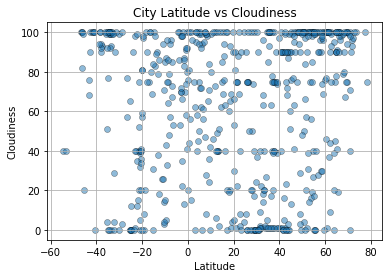

In [44]:
x_values = weather_data["Lat"]
y_values = weather_data["Cloudiness"]

# fig1, ax1 = plt.subplots(figsize=(11,8))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=.5, marker="o", alpha=0.5)
plt.title(f"City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

## Latitude vs. Wind Speed Plot

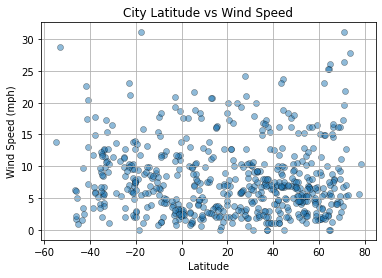

In [45]:
x_values = weather_data["Lat"]
y_values = weather_data["Wind Speed"]

# fig1, ax1 = plt.subplots(figsize=(11,8))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=.5, marker="o", alpha=0.5)
plt.title(f"City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [46]:
north_hem_data = weather_data.loc[weather_data["Lat"] >=0 ]
south_hem_data = weather_data.loc[weather_data["Lat"] < 0]


R squared: 0.7467050423412017
The r value is -0.864120965109169


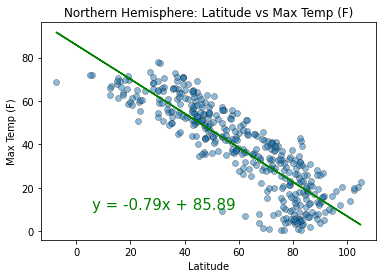

In [73]:
x_values = north_hem_data["Max Temp"]
y_values = north_hem_data["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, edgecolor="black", linewidth=.5, marker="o", alpha=0.5)

plt.plot(x_values,regress_values,"g-")
plt.annotate(line_eq,(6,10),fontsize=15,color="green")

plt.title(f"Northern Hemisphere: Latitude vs Max Temp (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"R squared: {rvalue**2}")
print(f"The r value is {rvalue}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.5260878151289412
The r value is 0.725319112617985


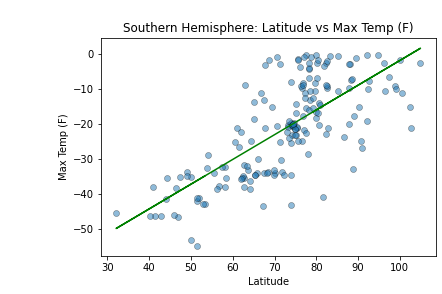

y = 0.71x + -72.49


In [72]:
x_values = south_hem_data["Max Temp"]
y_values = south_hem_data["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, edgecolor="black", linewidth=.5, marker="o", alpha=0.5)

plt.plot(x_values,regress_values,"g-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title(f"Southern Hemisphere: Latitude vs Max Temp (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"R squared: {rvalue**2}")
print(f"The r value is {rvalue}")

plt.show()
print(line_eq)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.061749632543804084
The r value is 0.2484947334327311


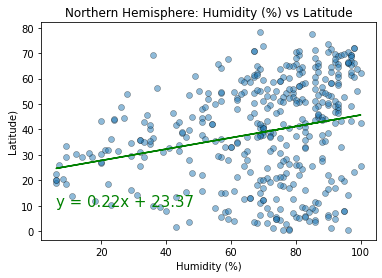

y = 0.22x + 23.37


In [71]:
x_values = north_hem_data["Humidity"]
y_values = north_hem_data["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, edgecolor="black", linewidth=.5, marker="o", alpha=0.5)

plt.plot(x_values,regress_values,"g-")
plt.annotate(line_eq,(6,10),fontsize=15,color="green")

plt.title(f"Northern Hemisphere: Humidity (%) vs Latitude")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude)")
print(f"R squared: {rvalue**2}")
print(f"The r value is {rvalue}")

plt.show()
print(line_eq)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.011080363557092946
The r value is -0.10526330584345595


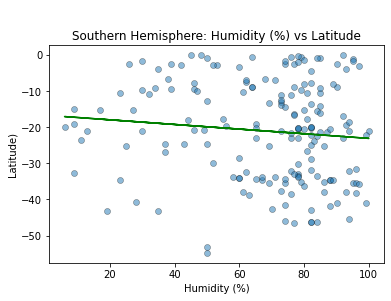

y = -0.06x + -16.7


In [70]:
x_values = south_hem_data["Humidity"]
y_values = south_hem_data["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, edgecolor="black", linewidth=.5, marker="o", alpha=0.5)

plt.plot(x_values,regress_values,"g-")
plt.annotate(line_eq,(6,10),fontsize=15,color="green")

plt.title(f"Southern Hemisphere: Humidity (%) vs Latitude")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude)")
print(f"R squared: {rvalue**2}")
print(f"The r value is {rvalue}")

plt.show()
print(line_eq)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.03349107060100965
The r value is 0.18300565729236254


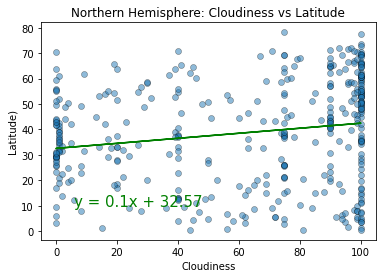

y = 0.1x + 32.57


In [69]:
x_values = north_hem_data["Cloudiness"]
y_values = north_hem_data["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, edgecolor="black", linewidth=.5, marker="o", alpha=0.5)

plt.plot(x_values,regress_values,"g-")
plt.annotate(line_eq,(6,10),fontsize=15,color="green")

plt.title(f"Northern Hemisphere: Cloudiness vs Latitude")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude)")
print(f"R squared: {rvalue**2}")
print(f"The r value is {rvalue}")

plt.show()
print(line_eq)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.0061495793136978495
The r value is -0.07841925346302303


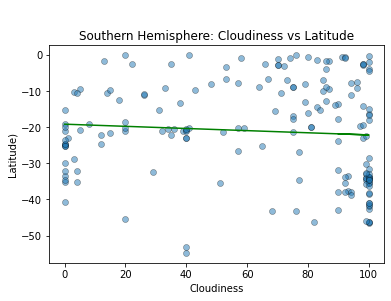

y = -0.03x + -19.19


In [68]:
x_values = south_hem_data["Cloudiness"]
y_values = south_hem_data["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, edgecolor="black", linewidth=.5, marker="o", alpha=0.5)

plt.plot(x_values,regress_values,"g-")
plt.annotate(line_eq,(6,10),fontsize=15,color="green")

plt.title(f"Southern Hemisphere: Cloudiness vs Latitude")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude)")
print(f"R squared: {rvalue**2}")
print(f"The r value is {rvalue}")

plt.show()
print(line_eq)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.006881110380910047
The r value is 0.0829524585585626


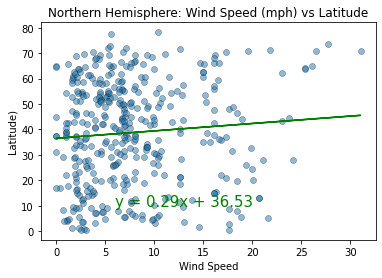

y = 0.29x + 36.53


In [74]:
x_values = north_hem_data["Wind Speed"]
y_values = north_hem_data["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, edgecolor="black", linewidth=.5, marker="o", alpha=0.5)

plt.plot(x_values,regress_values,"g-")
plt.annotate(line_eq,(6,10),fontsize=15,color="green")

plt.title(f"Northern Hemisphere: Wind Speed (mph) vs Latitude")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude)")
print(f"R squared: {rvalue**2}")
print(f"The r value is {rvalue}")

plt.show()
print(line_eq)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.020303748465731065
The r value is -0.1424912224164389


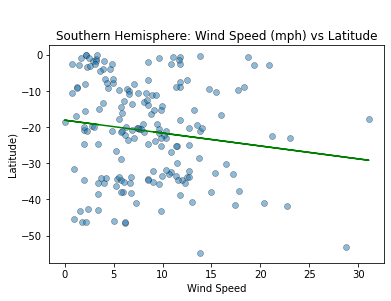

y = -0.36x + -18.08


In [75]:
x_values = south_hem_data["Wind Speed"]
y_values = south_hem_data["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, edgecolor="black", linewidth=.5, marker="o", alpha=0.5)

plt.plot(x_values,regress_values,"g-")
plt.annotate(line_eq,(6,10),fontsize=15,color="green")

plt.title(f"Southern Hemisphere: Wind Speed (mph) vs Latitude")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude)")
print(f"R squared: {rvalue**2}")
print(f"The r value is {rvalue}")

plt.show()
print(line_eq)